In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from __future__ import print_function
import matplotlib.pyplot as mpl

## قسمت الف

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,x,y
0,-10.0,1.2
1,-9.0,4.2
2,-8.0,6.7
3,-7.0,8.3
4,-6.0,10.6


In [4]:
x = df['x']

In [5]:
y= df['y']

In [6]:
xdata = np.asarray(x)
ydata = np.asarray(y)

Text(0, 0.5, 'Y - value')

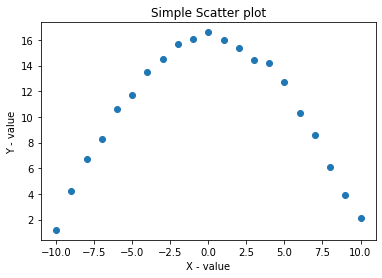

In [7]:
plt.scatter(xdata, ydata)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('X - value')
plt.ylabel('Y - value')

## قسمت ب

In [8]:
def Gauss(x, A, m, sigma):
    return A * np.exp(-(x - m) ** 2 / (2 * sigma ** 2)) 

## قسمت ج

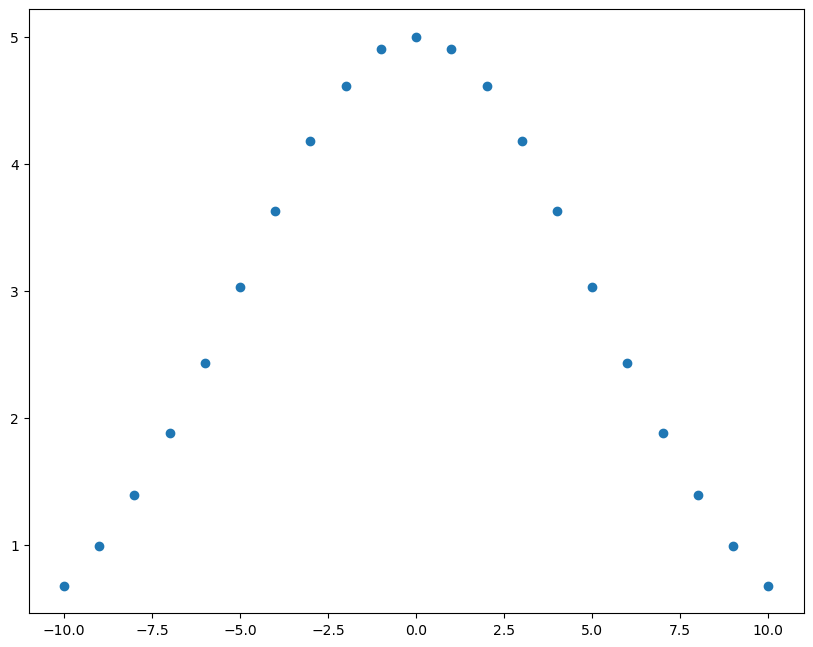

In [9]:
y_pred = Gauss(xdata,5,0,5)
plt.plot(xdata, y_pred, 'o', label='data')

In [10]:
def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

In [11]:
print(mse(ydata,y_pred))

71.31482618309226


## قسمت د

In [12]:
popt, pcov= curve_fit(Gauss,xdata, ydata)

In [13]:
fit_y = Gauss(x, popt[0], popt[1], popt[2])

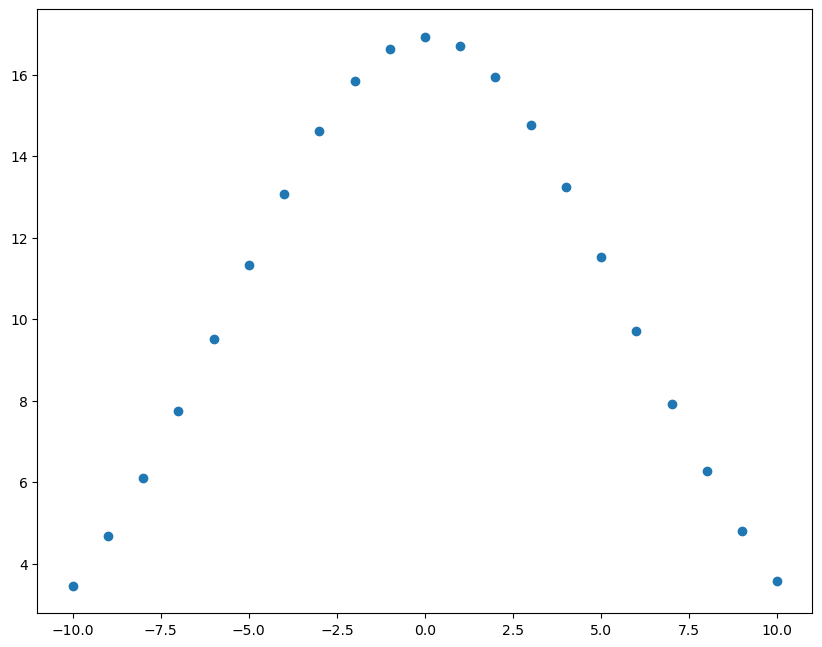

In [14]:
plt.plot(xdata, fit_y, 'o', label='fit')

In [15]:
print(mse(ydata,fit_y))

0.7105533649795382


### میزان خطا به شکل قابل توجهی کاهش یافت

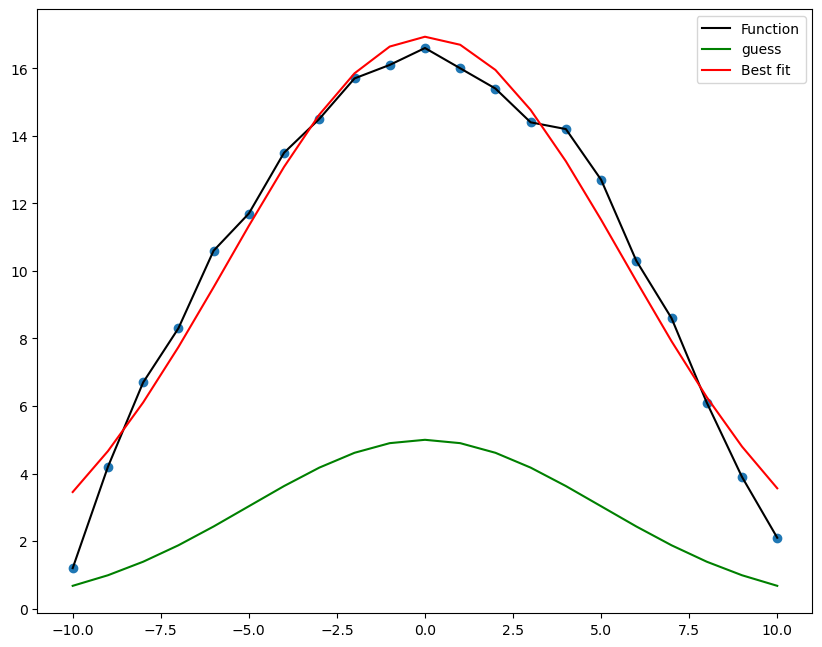

In [16]:
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, y)
ax.plot(x,y_pred, c='g', label='guess')
ax.plot(x, fit_y, c='r', label='Best fit')
ax.legend()

## قسمت ه

In [17]:
def cos_func(times, amplitude, frequency):
    return amplitude * np.cos(frequency * times)

In [18]:
popt1, pcov1 = curve_fit(cos_func,xdata,ydata)  

In [19]:
y_fit2 = cos_func(xdata,popt1[0],popt1[1])

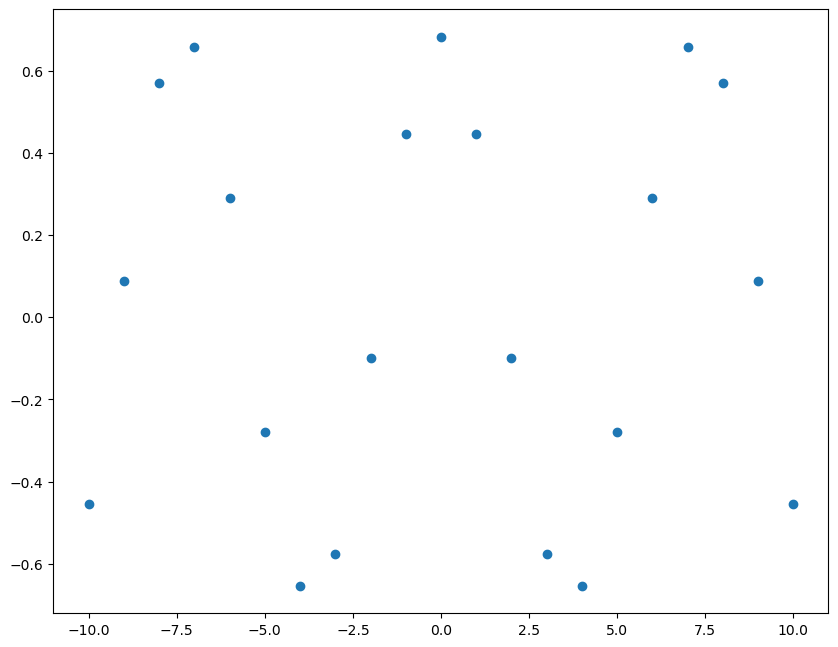

In [20]:
plt.plot(xdata, y_fit2, 'o', label='fit')

In [21]:
print(mse(ydata,y_fit2))

135.78758804144437


## قسمت و

In [22]:
popt2, pcov2 = curve_fit(cos_func,xdata,ydata,p0=(16,0.25)) 

In [23]:
y_fit3 = cos_func(xdata,popt2[0],popt2[1])

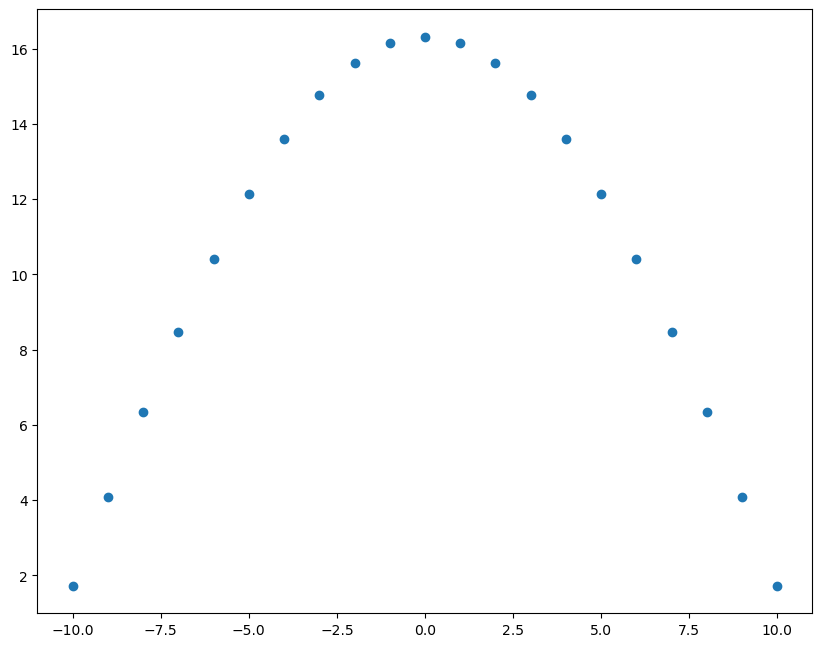

In [24]:
plt.plot(xdata, y_fit3, 'o', label='fit')

In [25]:
print(mse(ydata,y_fit3))

0.09479772192520139


### خطا خیلی کم شد و مدل هم شبیه حالت الف شد